In [1]:
!pip install jupyter-summarytools -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 15.3 MB/s eta 0:00:00


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from summarytools import dfSummary

from google.colab import drive

In [3]:
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
path = '/content/drive/MyDrive/0 Data Portfolio/Olist/FactOrders.csv'

df = pd.read_csv(path)

df

,order_id,pagamento_totale,valutazione_media,ritardo_consegna_giorni,qta_item,qta_venditori,tempo_spedizione_tot
0,2ce1ad82022c1ba30c2079502ac725aa,"130,56",5,-15.0,1.0,1.0,7.0
1,1446390485bfa8ea593dbd273d725218,"102,64",5,-15.0,1.0,1.0,7.0
2,5a88502f6bbc1f8c972aa98c64830616,"103,14",5,-15.0,1.0,1.0,7.0
3,f72c493e7f65e42101baca23c7c2fd90,"211,77",5,-15.0,1.0,1.0,7.0
4,564a38ee15a841a89a3e5c64fc8c0ce6,"164,79",5,-15.0,1.0,1.0,7.0
...,...,...,...,...,...,...,...
99436,6cf5c427fb11bc5fe8abefa86aa7ba0b,"131,78",1,NaN,NaN,NaN,NaN
99437,1c7c8ab324927f5b6e52338bd110bef4,"934,09",1,NaN,NaN,NaN,NaN
99438,aaab15da689073f8f9aa978a390a69d1,"210,09",1,NaN,NaN,NaN,NaN
99439,a69ba794cc7deb415c3e15a0a3877e69,"195,91",1,NaN,NaN,NaN,NaN


In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   order_id                 99441 non-null  object 
 1   pagamento_totale         99440 non-null  object 
 2   valutazione_media        98673 non-null  object 
 3   ritardo_consegna_giorni  96476 non-null  float64
 4   qta_item                 98666 non-null  float64
 5   qta_venditori            98666 non-null  float64
 6   tempo_spedizione_tot     96476 non-null  float64
dtypes: float64(4), object(3)
memory usage: 5.3+ MB


In [6]:
df['pagamento_totale'] = df['pagamento_totale'].str.replace(",", ".")
df['valutazione_media'] = df['valutazione_media'].str.replace(",", ".")

In [7]:
df['pagamento_totale'] = df['pagamento_totale'].astype(float)
df['valutazione_media'] = df['valutazione_media'].astype(float)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   order_id                 99441 non-null  object 
 1   pagamento_totale         99440 non-null  float64
 2   valutazione_media        98673 non-null  float64
 3   ritardo_consegna_giorni  96476 non-null  float64
 4   qta_item                 98666 non-null  float64
 5   qta_venditori            98666 non-null  float64
 6   tempo_spedizione_tot     96476 non-null  float64
dtypes: float64(6), object(1)
memory usage: 5.3+ MB


In [9]:
df_clean = df.dropna(subset = ['valutazione_media', 'ritardo_consegna_giorni', 'pagamento_totale'])

In [10]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 95829 entries, 0 to 98637
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   order_id                 95829 non-null  object 
 1   pagamento_totale         95829 non-null  float64
 2   valutazione_media        95829 non-null  float64
 3   ritardo_consegna_giorni  95829 non-null  float64
 4   qta_item                 95829 non-null  float64
 5   qta_venditori            95829 non-null  float64
 6   tempo_spedizione_tot     95829 non-null  float64
dtypes: float64(6), object(1)
memory usage: 5.8+ MB


In [11]:
dfSummary(df_clean)

No,Variable,Stats / Values,Freqs / (% of Valid),Graph,Missing
1,order_id[object],1. 60c46973a2a9ad727ea9c45695b2b32. 2ce1ad82022c1ba30c2079502ac7253. 1446390485bfa8ea593dbd273d72524. 5a88502f6bbc1f8c972aa98c6483065. f72c493e7f65e42101baca23c7c2fd6. 7811343e37a3cbe3fd4755f1a448c77. cb3b0bc0bdf657e358637e649e0a498. 39f9559c0533f3ea56143c01bfdd7d9. 4ea517483bf1d3580730f6042334d110. 44c536f6ba15a4faf44a3b9aa9ee8011. other,"1 (0.0%)1 (0.0%)1 (0.0%)1 (0.0%)1 (0.0%)1 (0.0%)1 (0.0%)1 (0.0%)1 (0.0%)1 (0.0%)95,819 (100.0%)","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAAD+CAYAAAAtWHdlAAAAOnRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjEwLjAsIGh0dHBzOi8vbWF0cGxvdGxpYi5vcmcvlHJYcgAAAAlwSFlzAAAPYQAAD2EBqD+naQAAAy5JREFUeJzt3MGN02AURtHnKIJhY2tkKSVADymCLb3ThTcwrMKCHq4lc04F/+JKT5H8ZXm9XgOF29kP4P8hNjJiIyM2MmIjIzYyYiMjNjJiIyM2MrdlWb4ty/J29kO4vtvMfJ2Zz2c/hOtzRsmIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNzG1mfs7Mn7MfwvUt/sWIijNKRmxkrKvIWFeRcUbJiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MgYvJAxeCHjjJIRGxmDFzIGL2ScUTJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MgYvZAxeyDijZMRGRmxkrKvIWFeRcUbJiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MhYV5GxriLjjJIRGxmDFzIGL2ScUTJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MgYvZAxeyDijZMRGxuCFjMELGWeUjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MhYV5GxriLjjJIRGxnrKjLWVWScUTJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MgYvZAxeyDijZMRGxuCFjMELGWeUjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2MwQsZgxcyzigZsZERGxnrKjLWVWScUTJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MtZVZKyryDijZMRGxuCFjMELGWeUjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2MwQsZgxcyziiZZWa+zMynsx/C9d33ff++ruv72Q/h+u7rur4/n8/f27Z9nP0Yrus4jrf7zMy2bR+Px+PX2Q/i2vxAICM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiI3Of+ff5x9kP4dqO43hb9n3/4eNJCj4LJ2NdRcYPBDJiIyM2MmIjIzYyYiMjNjJiIyM2Mn8BY+dLgsx6ZCoAAAAASUVORK5CYII="">",0(0.0%)
2,pagamento_totale[float64],Mean (sd) : 159.6 (217.5)min < med < max:9.6 < 105.3 < 13664.1IQR (CV) : 114.3 (0.7),"26,935 distinct values","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOnRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjEwLjAsIGh0dHBzOi8vbWF0cGxvdGxpYi5vcmcvlHJYcgAAAAlwSFlzAAAPYQAAD2EBqD+naQAAAWlJREFUeJzt109qAjEYh+GkiOhmBhE8jIfoYXsIbyMlLqotSLrrptQ/46L90efZJvnI4mWG1N57gb/u6bcvALeYXdtQa12WUuYT53/03o8Tz8KXi6HWWpfr9fp5GIbVlOGHw+G11voiVh517Ys6H4Zhtd1uj+M4nu4Z3Fpb7Ha71X6/n5dShMpDrv76SyllHMfTZrN5mzB/OeEMfOMxRQShEkGoRBAqEYRKBKESQahEECoRhEoEoRJBqEQQKhGESgShEkGoRBAqEYRKBKESQahEECoRhEoEoRJBqEQQKhGESgShEkGoRBAqEYRKBKESQahEECoRhEoEoRJBqEQQKhGESgShEkGoRBAqEYRKBKESQahEECoRhEoEoRJBqEQQKhGESgShEkGoRBAqEYRKBKESQahEECoRhEoEoRJBqEQQKhGESgShEkGoRJjdsqm1trh3cGttcT6fZ6WUodZ698X4d95776efFj8Be/ct8q45XZ8AAAAASUVORK5CYII="">",0(0.0%)
3,valutazione_media[float64],Mean (sd) : 4.2 (1.3)min < med < max:1.0 < 5.0 < 5.0IQR (CV) : 1.0 (3.2),11 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOnRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjEwLjAsIGh0dHBzOi8vbWF0cGxvdGxpYi5vcmcvlHJYcgAAAAlwSFlzAAAPYQAAD2EBqD+naQAAAb1JREFUeJzt3U2K4kAAhuGqQUQ3CSJ4GA8xh51DeBsZ4mK6GTCZ1UBvuv3phPiF59nGMkFeLcpaVB2GocCr+zH3A8A9VnM/AMtRa92WUtZPDv87DMPbZxeFyihqrdv9fv+zaZrdM+Mvl8vvWuuvz2IVKmNZN02zOx6Pb23bvj8ysOu6zel02p3P53UpRahMr23b98Ph8OeJoduvLlpMEUGoRBAqEYRKBKESQahEECoRhEoEoRJBqEQQKhGESgShEkGoRBAqEYRKBKESQahEECoRhEoEoRJBqEQQKhGESgShEkGoRBAqEYRKBKESQahEECoRhEoEoRJBqEQQKhGESgShEkGoRBAqEYRKBKESwcl9CzPlwblzEuqCTH1w7pyEuiyTHpw7J6Eu0FQH587JYooIQiWCUIkgVCIIlQhCJYJQiXDzf9SlbsmR5ctQl7wlR5Zbv6iL3ZKbkllofHdtoS5xS24qZqFp2Osfn1loAkKdiFloXP6eIoJQifDSU7/VM/+9bKhWz3z0sqEWq2c+uCvUrus2j75x13Wb6/W6KqU0tdaHH6yU0vR9//QX6Zv3/o6m7/vVnJ9Z4r1vveYffnK/6uFHhSkAAAAASUVORK5CYII="">",0(0.0%)
4,ritardo_consegna_giorni[float64],Mean (sd) : -11.9 (10.1)min < med < max:-147.0 < -12.0 < 188.0IQR (CV) : 10.0 (-1.2),196 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOnRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjEwLjAsIGh0dHBzOi8vbWF0cGxvdGxpYi5vcmcvlHJYcg

In [12]:
df_clean = df_clean.copy()

In [13]:
df_clean['qta_venditori'] = df_clean['qta_venditori'].astype(int)

In [14]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 95829 entries, 0 to 98637
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   order_id                 95829 non-null  object 
 1   pagamento_totale         95829 non-null  float64
 2   valutazione_media        95829 non-null  float64
 3   ritardo_consegna_giorni  95829 non-null  float64
 4   qta_item                 95829 non-null  float64
 5   qta_venditori            95829 non-null  int64  
 6   tempo_spedizione_tot     95829 non-null  float64
dtypes: float64(5), int64(1), object(1)
memory usage: 5.8+ MB


In [15]:
custom_params = {'axes.spines.right': False, 'axes.spines.top': False}
sns.set_theme(style='ticks', palette = 'hls', rc=custom_params)

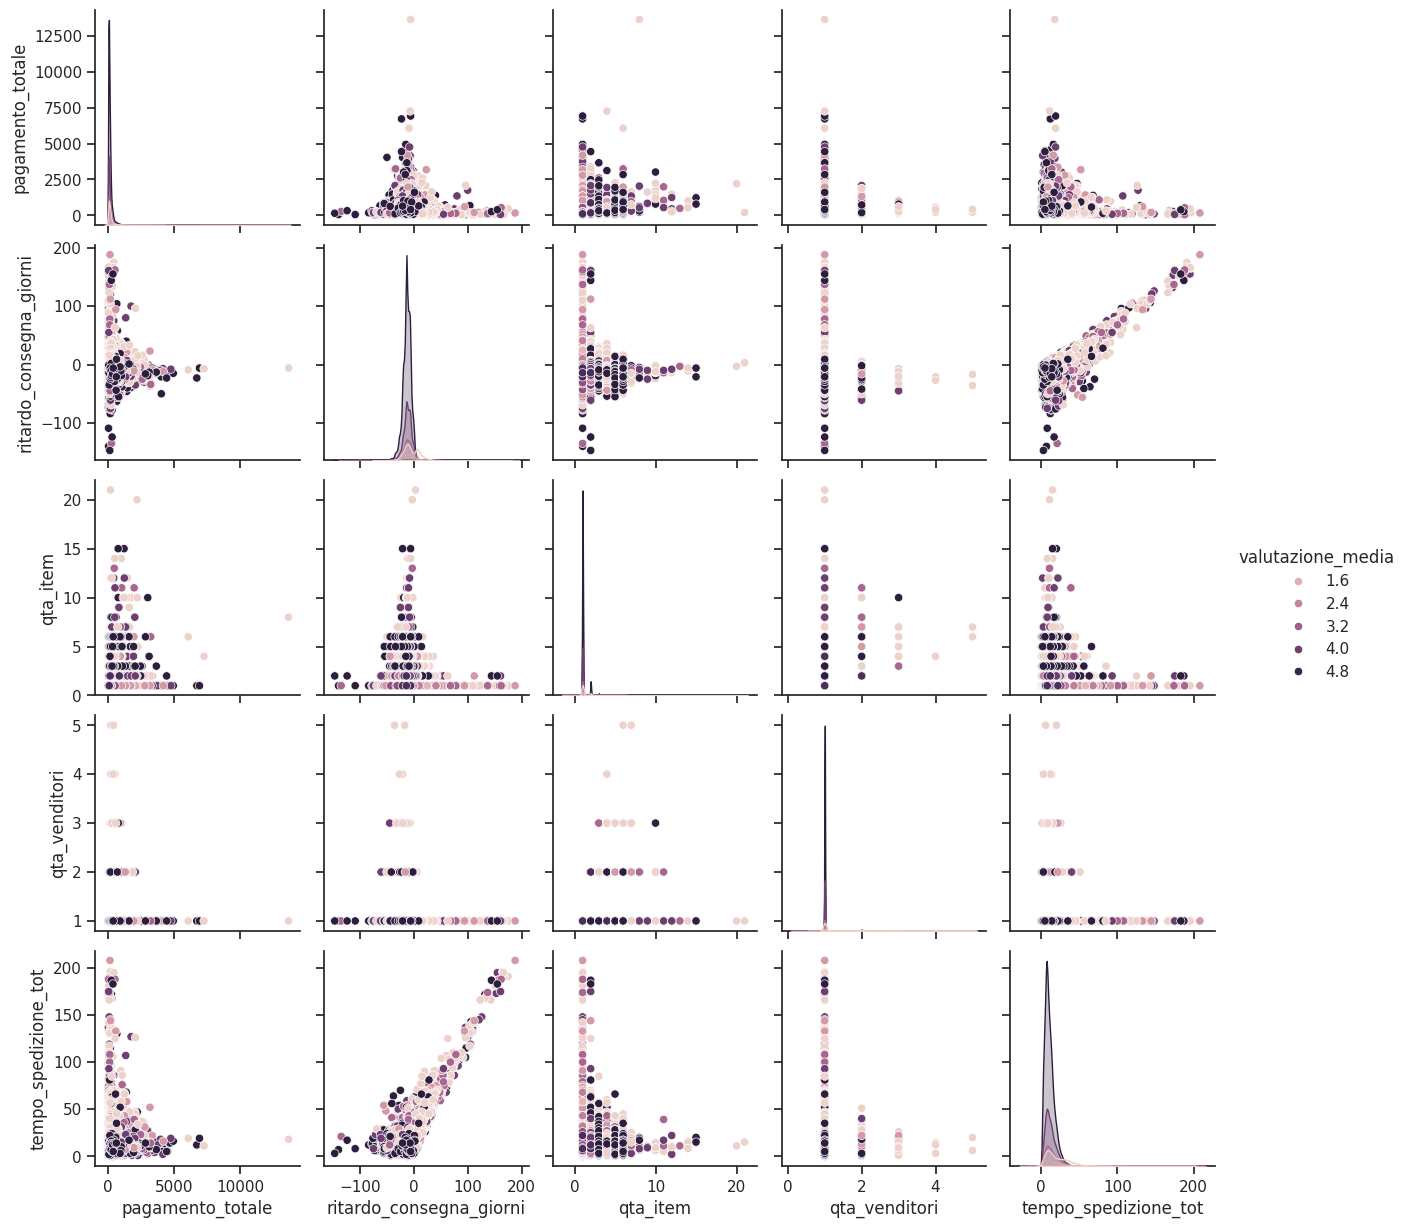

In [16]:
sns.pairplot(df_clean, hue = 'valutazione_media')

<Axes: ylabel='ritardo_consegna_giorni'>

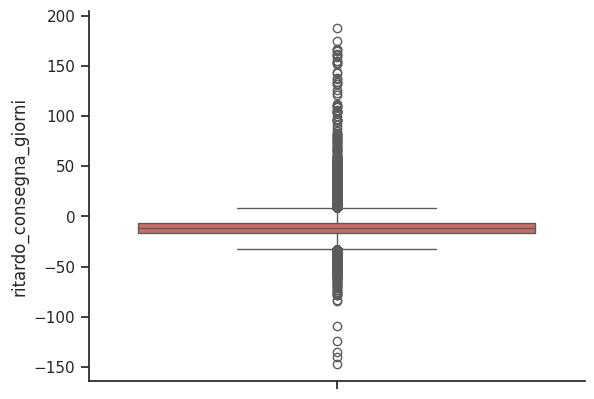

In [17]:
sns.boxplot(df_clean['ritardo_consegna_giorni'])

In [18]:
df_clean['qta_venditori'] = pd.Categorical(
    df_clean['qta_venditori'],
    categories=[1, 2, 3, 4, 5],
    ordered=True
)

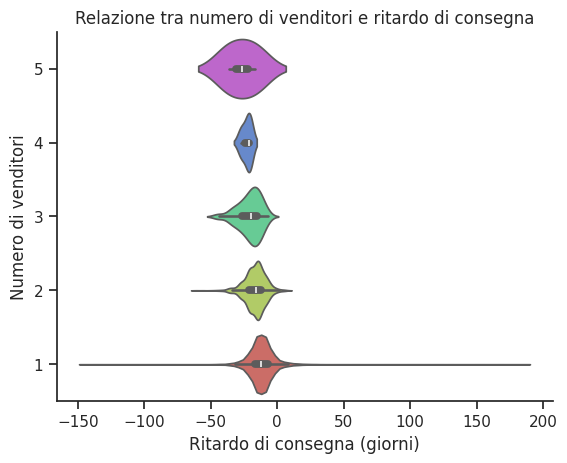

In [19]:
sns.violinplot(
    data=df_clean,
    x='ritardo_consegna_giorni',
    y='qta_venditori',
    hue = 'qta_venditori',
    order=[5, 4, 3, 2, 1],
    legend = False,
    palette = 'hls'
)
plt.title("Relazione tra numero di venditori e ritardo di consegna")
plt.ylabel('Numero di venditori')
plt.xlabel('Ritardo di consegna (giorni)');

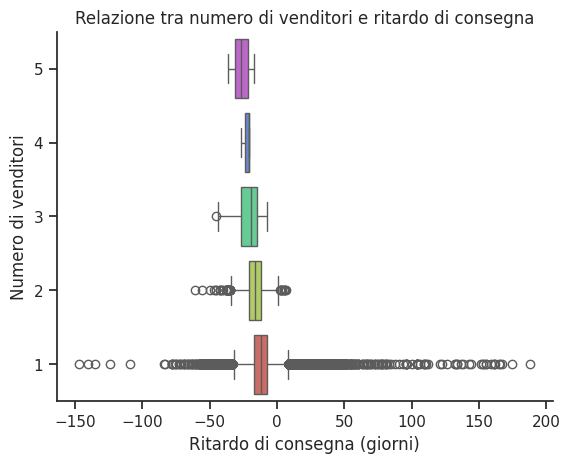

In [20]:
sns.boxplot(
    data=df_clean,
    x='ritardo_consegna_giorni',
    y='qta_venditori',
    hue = 'qta_venditori',
    order=[5, 4, 3, 2, 1],
    legend = False,
    palette = 'hls'
)
plt.title("Relazione tra numero di venditori e ritardo di consegna")
plt.ylabel('Numero di venditori')
plt.xlabel('Ritardo di consegna (giorni)');

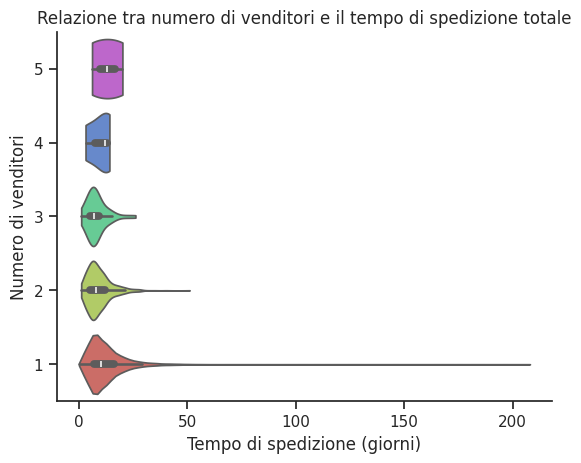

In [21]:
sns.violinplot(
    data=df_clean,
    x='tempo_spedizione_tot',
    y='qta_venditori',
    hue = 'qta_venditori',
    order=[5, 4, 3, 2, 1],
    legend = False,
    palette = 'hls',
    cut = 0
)
plt.title("Relazione tra numero di venditori e il tempo di spedizione totale")
plt.ylabel('Numero di venditori')
plt.xlabel('Tempo di spedizione (giorni)');

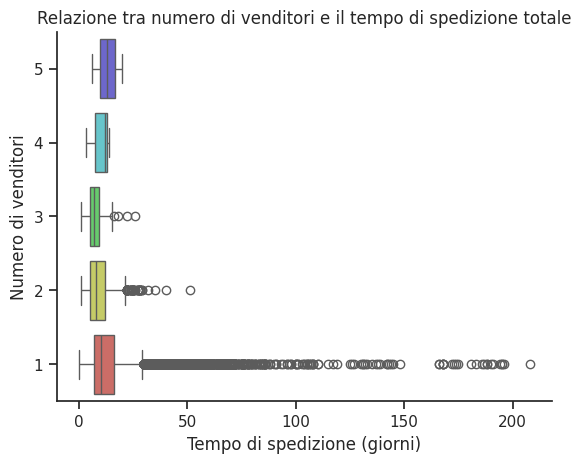

In [22]:
sns.boxplot(
    data=df_clean,
    x='tempo_spedizione_tot',
    y='qta_venditori',
    hue = 'qta_venditori',
    order=[5, 4, 3, 2, 1],
    legend = False
)
plt.title("Relazione tra numero di venditori e il tempo di spedizione totale")
plt.ylabel('Numero di venditori')
plt.xlabel('Tempo di spedizione (giorni)');

<Axes: xlabel='qta_venditori', ylabel='count'>

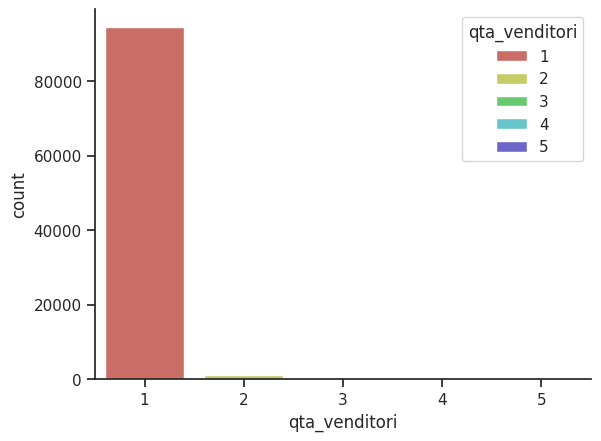

In [23]:
sns.countplot(data = df_clean, x = 'qta_venditori', hue = 'qta_venditori')

In [24]:
df_clean['qta_venditori'] = df_clean['qta_venditori'].astype(int)

In [25]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 95829 entries, 0 to 98637
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   order_id                 95829 non-null  object 
 1   pagamento_totale         95829 non-null  float64
 2   valutazione_media        95829 non-null  float64
 3   ritardo_consegna_giorni  95829 non-null  float64
 4   qta_item                 95829 non-null  float64
 5   qta_venditori            95829 non-null  int64  
 6   tempo_spedizione_tot     95829 non-null  float64
dtypes: float64(5), int64(1), object(1)
memory usage: 7.9+ MB


In [26]:
df_clean.corr(numeric_only=True)

,pagamento_totale,valutazione_media,ritardo_consegna_giorni,qta_item,qta_venditori,tempo_spedizione_tot
pagamento_totale,1.000000,-0.042105,-0.019028,0.189569,0.054471,0.069726
valutazione_media,-0.042105,1.000000,-0.266908,-0.123291,-0.117091,-0.334109
ritardo_consegna_giorni,-0.019028,-0.266908,1.000000,-0.032130,-0.059189,0.601559
qta_item,0.189569,-0.123291,-0.032130,1.000000,0.287537,-0.019848
qta_venditori,0.054471,-0.117091,-0.059189,0.287537,1.000000,-0.040593
tempo_spedizione_tot,0.069726,-0.334109,0.601559,-0.019848,-0.040593,1.000000


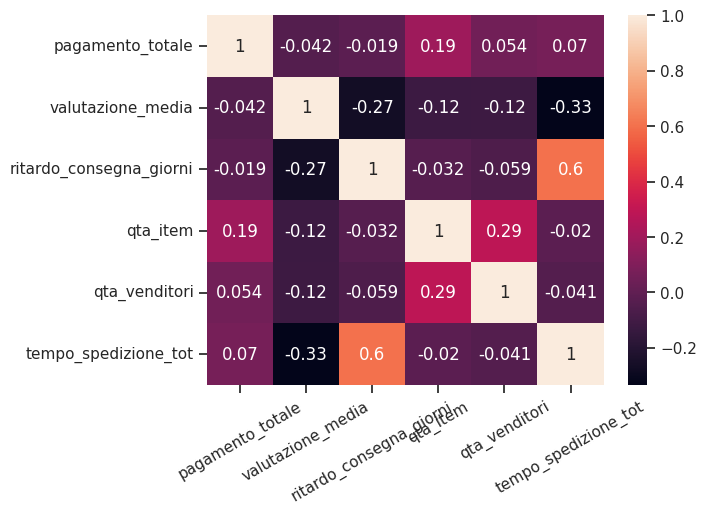

In [27]:
sns.heatmap(df_clean.corr(numeric_only=True), annot = True);
plt.xticks(rotation = 30);